In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [ ]:
with open('results.pickle', 'rb') as file:
    # Load the pickled list from the file
    results = pickle.load(file)

In [ ]:
# Change absolute costs into relative deviation from No AL
for dfs in results:
    no_al_cost = dfs[0].copy()['Cost']
    for df in dfs:
        df['Cost'] = df['Cost'] / no_al_cost -1

In [ ]:
# Performance Table for each Dataset and each Strategy
for dfs in results:
    for df in dfs:
        print(df)
        print(np.mean(df))

        AUC      PAUC        BS  Cost
0  0.780906  0.557432  0.169031   0.0
1  0.651163  0.400000  0.247075   0.0
2  0.740489  0.788889  0.244300   0.0
3  0.906015  0.615385  0.184957   0.0
4  0.841492  0.809524  0.197948   0.0
5  0.589245  0.403509  0.279759   0.0
6  0.822997  0.214286  0.262741   0.0
7  0.667073  0.424242  0.265072   0.0
8  0.705797  0.745455  0.248380   0.0
AUC     0.745020
PAUC    0.550969
BS      0.233252
Cost    0.000000
dtype: float64
        AUC      PAUC        BS      Cost
0  0.780906  0.557432  0.169031  0.000000
1  0.635251  0.432950  0.254904  0.041544
2  0.591033  0.433498  0.293870  0.143637
3  0.869674  0.722222  0.220951  0.092304
4  0.822844  0.866667  0.240565 -0.111736
5  0.631579  0.555556  0.289875 -0.191860
6  0.830749  0.782609  0.264976 -0.103898
7  0.609756  0.448864  0.306190  0.030269
8  0.713043  0.733333  0.264291 -0.071666
AUC     0.720537
PAUC    0.614792
BS      0.256073
Cost   -0.019045
dtype: float64
        AUC      PAUC        BS   

# All Datasets

## Average

In [ ]:
# Generate the average performance for each strategy in each round
all_datasets_mean=[]
for i in range(len(results[0])):
    to_average=[]
    for datasets in results:
        to_average.append(datasets[i])
    concatenated_df = pd.concat(to_average)
    averages_df = concatenated_df.groupby(concatenated_df.index).mean()
    averages_df = averages_df.reset_index(drop=True)
    all_datasets_mean.append(averages_df)

In [ ]:
all_datasets_mean

[        AUC      PAUC        BS  Cost
 0  0.641850  0.563926  0.248621   0.0
 1  0.665204  0.598399  0.225722   0.0
 2  0.673937  0.597060  0.226184   0.0
 3  0.689608  0.603613  0.222961   0.0
 4  0.669281  0.597601  0.228215   0.0
 5  0.651758  0.570070  0.236345   0.0
 6  0.691789  0.557601  0.232637   0.0
 7  0.651083  0.552608  0.241503   0.0
 8  0.663588  0.588291  0.237039   0.0,
         AUC      PAUC        BS      Cost
 0  0.641850  0.563926  0.248621  0.000000
 1  0.656024  0.578446  0.229213 -0.002454
 2  0.661384  0.559815  0.235624 -0.002073
 3  0.689223  0.628413  0.229120 -0.026201
 4  0.673376  0.581619  0.237214 -0.037186
 5  0.656647  0.611620  0.243598 -0.045120
 6  0.693752  0.609142  0.240899 -0.036028
 7  0.651379  0.540102  0.252458  0.011928
 8  0.673432  0.608419  0.246159 -0.019864,
         AUC      PAUC        BS      Cost
 0  0.641850  0.563926  0.248621  0.048195
 1  0.672420  0.573856  0.217706  0.037481
 2  0.677330  0.594622  0.222591  0.004271
 3  0.

In [ ]:
# Generate the average performance for each strategy
all_datasets_mean_total=[np.mean(df) for df in all_datasets_mean]

In [ ]:
all_datasets_mean_total

[AUC     0.666455
 PAUC    0.581019
 BS      0.233248
 Cost    0.000000
 dtype: float64,
 AUC     0.666341
 PAUC    0.586833
 BS      0.240323
 Cost   -0.017444
 dtype: float64,
 AUC     0.669084
 PAUC    0.569778
 BS      0.227486
 Cost    0.038905
 dtype: float64,
 AUC     0.691555
 PAUC    0.565021
 BS      0.275803
 Cost   -0.066051
 dtype: float64,
 AUC     0.712789
 PAUC    0.633543
 BS      0.178885
 Cost    0.034592
 dtype: float64,
 AUC     0.364458
 PAUC    0.474852
 BS      0.330618
 Cost    0.501958
 dtype: float64,
 AUC     0.626094
 PAUC    0.552336
 BS      0.219637
 Cost    0.011683
 dtype: float64]

In [ ]:
strategies = ['No AL', 'Benchmark RI', 'Random AL', 'ICP Prob', 'ICP Prob Cost', 'ICP NN Margin', 'ICP NN Margin Cost']  
# Create output dataframe
all_datasets_final = pd.DataFrame(
{'Strategies' : strategies,
 'AUC': [df['AUC'] for df in all_datasets_mean_total],
 'PAUC': [df['PAUC'] for df in all_datasets_mean_total],
'BS': [df['BS'] for df in all_datasets_mean_total],
'Cost': [df['Cost'] for df in all_datasets_mean_total]})
all_datasets_final.set_index('Strategies', inplace = True)    
all_datasets_final

,AUC,PAUC,BS,Cost
Strategies,,,,
No AL,0.666455,0.581019,0.233248,0.000000
Benchmark RI,0.666341,0.586833,0.240323,-0.017444
Random AL,0.669084,0.569778,0.227486,0.038905
ICP Prob,0.691555,0.565021,0.275803,-0.066051
ICP Prob Cost,0.712789,0.633543,0.178885,0.034592
NN Margin,0.364458,0.474852,0.330618,0.501958
NN Margin Cost,0.626094,0.552336,0.219637,0.011683


## Performance per Round

In [ ]:
# Extract AUC
all_datasets_AUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    all_datasets_AUC.iloc[:, i] = all_datasets_mean[i]['AUC']
all_datasets_AUC.index = all_datasets_AUC.index + 1

In [ ]:
# Extract PAUC
all_datasets_PAUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    all_datasets_PAUC.iloc[:, i] = all_datasets_mean[i]['PAUC']
all_datasets_PAUC.index = all_datasets_PAUC.index + 1

In [ ]:
# Extract BS
all_datasets_BS = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    all_datasets_BS.iloc[:, i] = all_datasets_mean[i]['BS']
all_datasets_BS.index = all_datasets_BS.index + 1

In [ ]:

#Extract Cost
all_datasets_Cost = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    all_datasets_Cost.iloc[:, i] = all_datasets_mean[i]['Cost']
all_datasets_Cost.index = all_datasets_Cost.index + 1

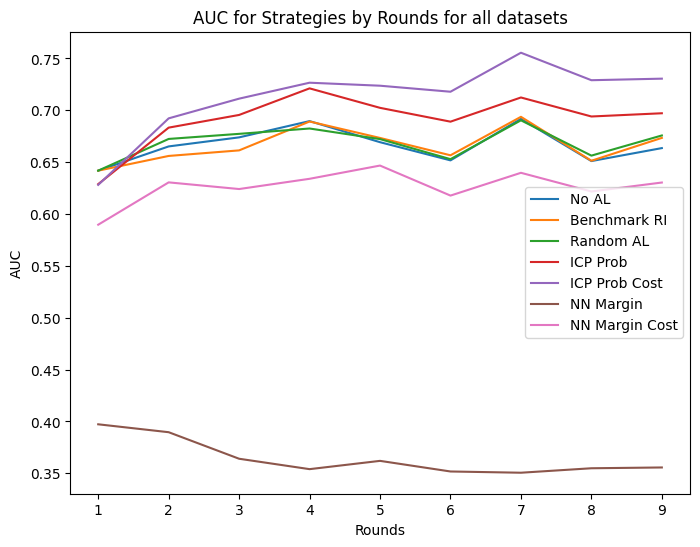

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in all_datasets_AUC.columns:
    ax.plot(all_datasets_AUC.index, all_datasets_AUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('AUC')
ax.set_title('AUC for Strategies by Rounds for all datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


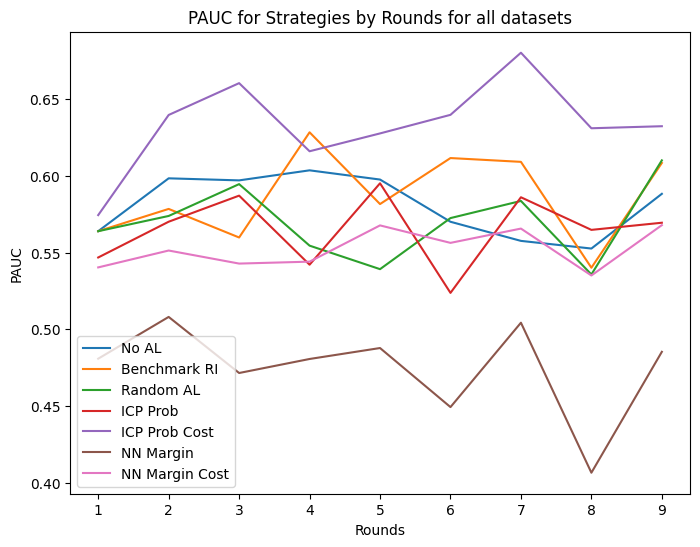

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in all_datasets_PAUC.columns:
    ax.plot(all_datasets_PAUC.index, all_datasets_PAUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('PAUC')
ax.set_title('PAUC for Strategies by Rounds for all datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


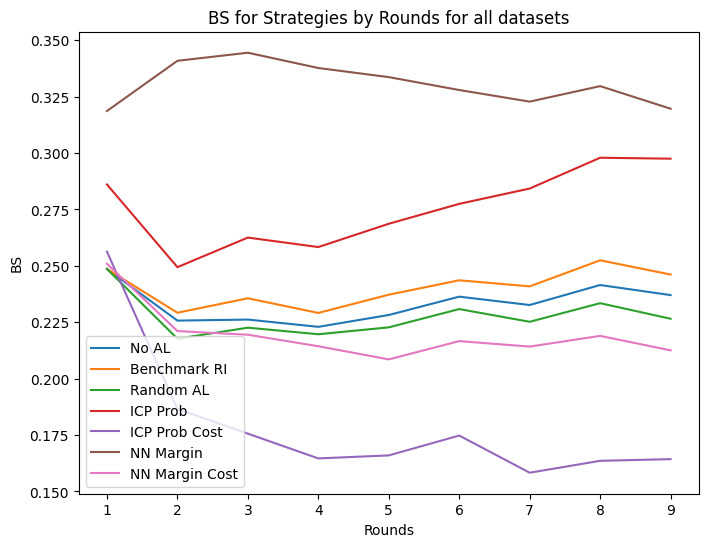

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in all_datasets_BS.columns:
    ax.plot(all_datasets_BS.index, all_datasets_BS[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('BS')
ax.set_title('BS for Strategies by Rounds for all datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


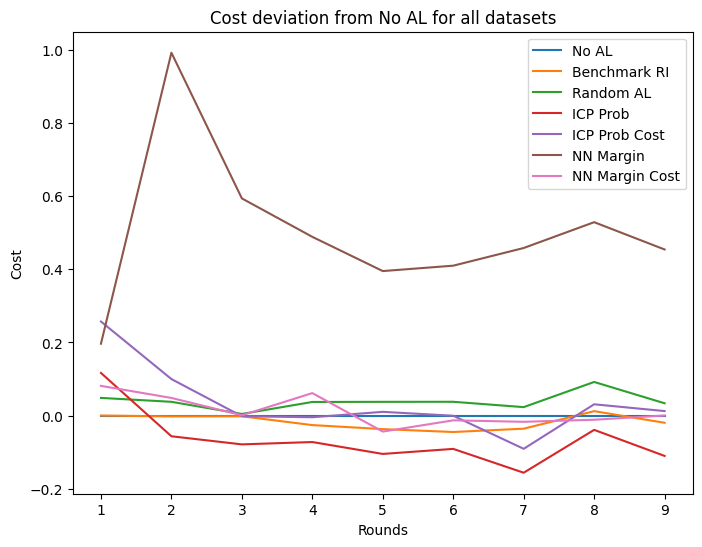

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in all_datasets_Cost.columns:
    ax.plot(all_datasets_Cost.index, all_datasets_Cost[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('Cost')
ax.set_title('Cost deviation from No AL for all datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Original Data

## Averages

In [ ]:
# Create average performance for each strategy in each round for original datasets
original_datasets = results[:6]
original_datasets_mean=[]
for i in range(len(original_datasets[0])):
    to_average=[]
    for datasets in original_datasets:
        to_average.append(datasets[i])
    concatenated_df = pd.concat(to_average)
    averages_df = concatenated_df.groupby(concatenated_df.index).mean()

    averages_df = averages_df.reset_index(drop=True)
    original_datasets_mean.append(averages_df)

In [ ]:
#Create average performance for each strategy for original datasets
original_datasets_mean_total=[np.mean(df) for df in original_datasets_mean]

In [ ]:

# Create output dataframe
original_datasets_final = pd.DataFrame(
{'Strategies' : strategies,
 'AUC': [df['AUC'] for df in original_datasets_mean_total],
 'PAUC': [df['PAUC'] for df in original_datasets_mean_total],
'BS': [df['BS'] for df in original_datasets_mean_total],
'Cost': [df['Cost'] for df in original_datasets_mean_total]})
original_datasets_final.set_index('Strategies', inplace = True)    
original_datasets_final

,AUC,PAUC,BS,Cost
Strategies,,,,
No AL,0.655913,0.565684,0.250197,0.000000
Benchmark RI,0.652631,0.581423,0.261750,-0.032952
Random AL,0.658748,0.555900,0.241575,-0.002153
ICP Prob,0.666183,0.549728,0.298816,-0.125726
ICP Prob Cost,0.682271,0.594231,0.160569,-0.181933
NN Margin,0.382967,0.455381,0.327585,0.223710
NN Margin Cost,0.612116,0.527340,0.215355,0.048140


## Performance per Round

In [ ]:

# Create output dataframe for AUC
original_datasets_AUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    original_datasets_AUC.iloc[:, i] = original_datasets_mean[i]['AUC']
original_datasets_AUC.index = original_datasets_AUC.index + 1

In [ ]:

# Create output dataframe for PAUC
original_datasets_PAUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    original_datasets_PAUC.iloc[:, i] = original_datasets_mean[i]['PAUC']
original_datasets_PAUC.index = original_datasets_PAUC.index + 1

In [ ]:
  
# Create output dataframe for BS
original_datasets_BS = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    original_datasets_BS.iloc[:, i] = original_datasets_mean[i]['BS']
original_datasets_BS.index = original_datasets_BS.index + 1

In [ ]:

# Create output dataframe for Cost
original_datasets_Cost = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    original_datasets_Cost.iloc[:, i] = original_datasets_mean[i]['Cost']
original_datasets_Cost.index = original_datasets_Cost.index + 1

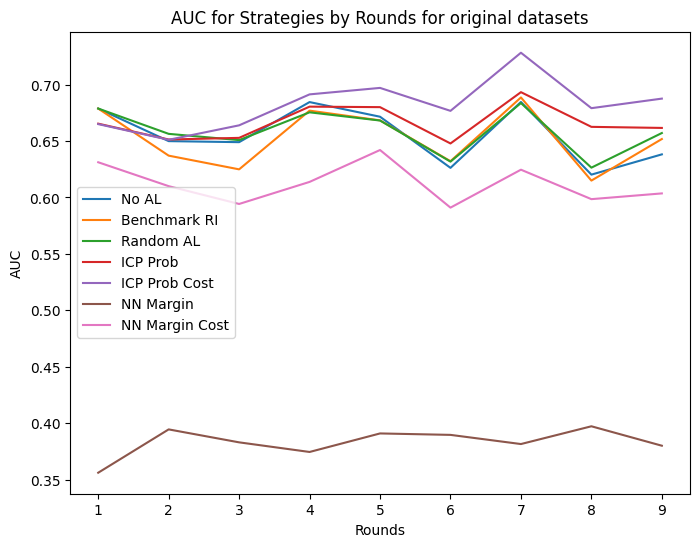

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in original_datasets_AUC.columns:
    ax.plot(original_datasets_AUC.index, original_datasets_AUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('AUC')
ax.set_title('AUC for Strategies by Rounds for original datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

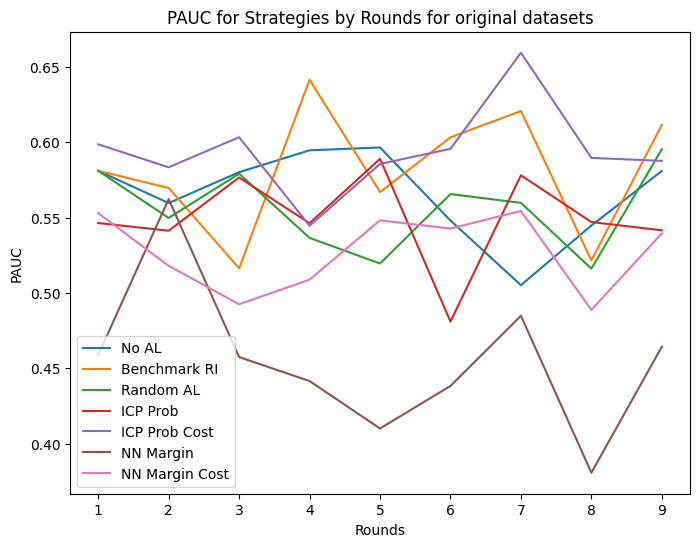

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in original_datasets_PAUC.columns:
    ax.plot(original_datasets_PAUC.index, original_datasets_PAUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('PAUC')
ax.set_title('PAUC for Strategies by Rounds for original datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

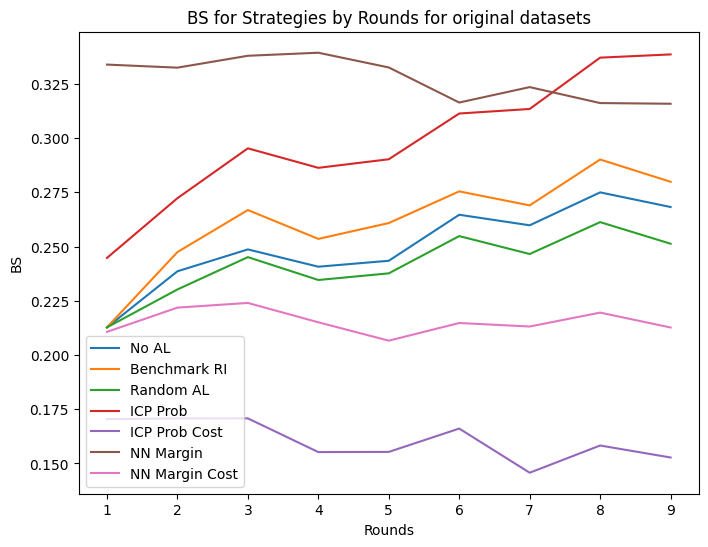

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in original_datasets_BS.columns:
    ax.plot(original_datasets_BS.index, original_datasets_BS[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('BS')
ax.set_title('BS for Strategies by Rounds for original datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

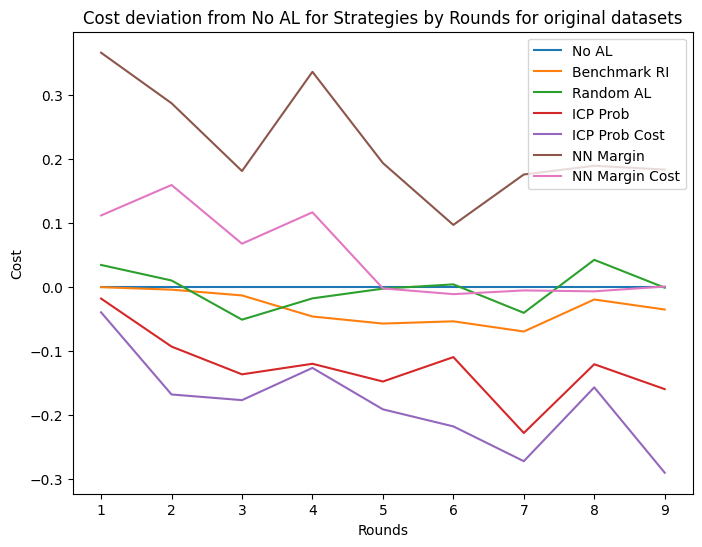

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in original_datasets_Cost.columns:
    ax.plot(original_datasets_Cost.index, original_datasets_Cost[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('Cost')
ax.set_title('Cost deviation from No AL for Strategies by Rounds for original datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# MC

In [ ]:
# Create performance per round for each strategy for MC datasets
MC_datasets = results[5:-1]
MC_datasets_mean=[]
for i in range(len(results[0])):
    to_average=[]
    for datasets in MC_datasets:
        to_average.append(datasets[i])
    concatenated_df = pd.concat(to_average)
    averages_df = concatenated_df.groupby(concatenated_df.index).mean()

    averages_df = averages_df.reset_index(drop=True)
    MC_datasets_mean.append(averages_df)

In [ ]:
# Create average performance for each strategy for MC datasets
MC_datasets_mean_total=[np.mean(df) for df in MC_datasets_mean]

In [ ]:

# Create output dataframe
MC_datasets_final = pd.DataFrame(
{'Strategies' : strategies,
 'AUC': [df['AUC'] for df in MC_datasets_mean_total],
 'PAUC': [df['PAUC'] for df in MC_datasets_mean_total],
'BS': [df['BS'] for df in MC_datasets_mean_total],
'Cost': [df['Cost'] for df in MC_datasets_mean_total]})
MC_datasets_final.set_index('Strategies', inplace = True)    
MC_datasets_final

,AUC,PAUC,BS,Cost
Strategies,,,,
No AL,0.643536,0.602438,0.236812,0.000000
Benchmark RI,0.645206,0.600663,0.244623,-0.037327
Random AL,0.650572,0.593873,0.235065,0.001590
ICP Prob,0.700264,0.572981,0.270389,-0.062001
ICP Prob Cost,0.730182,0.665465,0.211952,0.161024
NN Margin,0.377908,0.459338,0.328355,0.253551
NN Margin Cost,0.591324,0.531251,0.238723,0.053431


In [ ]:
 
# Create output dataframe for AUC
MC_datasets_AUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    MC_datasets_AUC.iloc[:, i] = MC_datasets_mean[i]['AUC']
MC_datasets_AUC.index = MC_datasets_AUC.index + 1

In [ ]:

# Create output dataframe for PAUC
MC_datasets_PAUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    MC_datasets_PAUC.iloc[:, i] = MC_datasets_mean[i]['PAUC']
MC_datasets_PAUC.index = MC_datasets_PAUC.index + 1

In [ ]:
 
# Create output dataframe for BS
MC_datasets_BS = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    MC_datasets_BS.iloc[:, i] = MC_datasets_mean[i]['BS']
MC_datasets_BS.index = MC_datasets_BS.index + 1

In [ ]:

# Create output dataframe for Cost
MC_datasets_Cost = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    MC_datasets_Cost.iloc[:, i] = MC_datasets_mean[i]['Cost']
MC_datasets_Cost.index = MC_datasets_Cost.index + 1

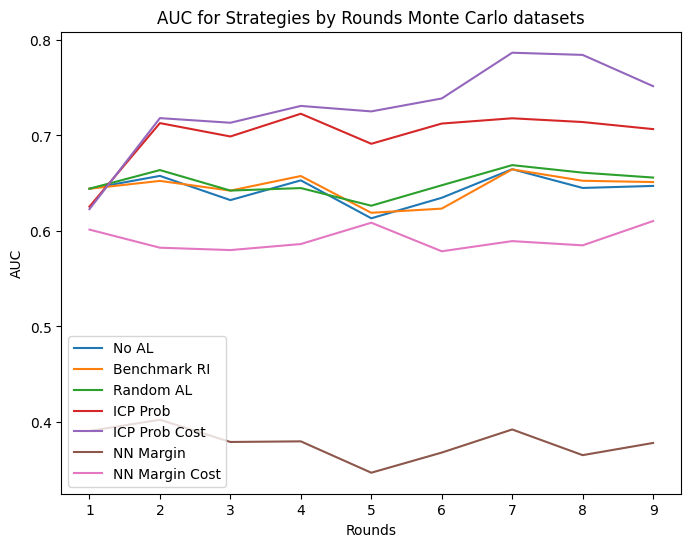

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in MC_datasets_AUC.columns:
    ax.plot(MC_datasets_AUC.index, MC_datasets_AUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('AUC')
ax.set_title('AUC for Strategies by Rounds Monte Carlo datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()


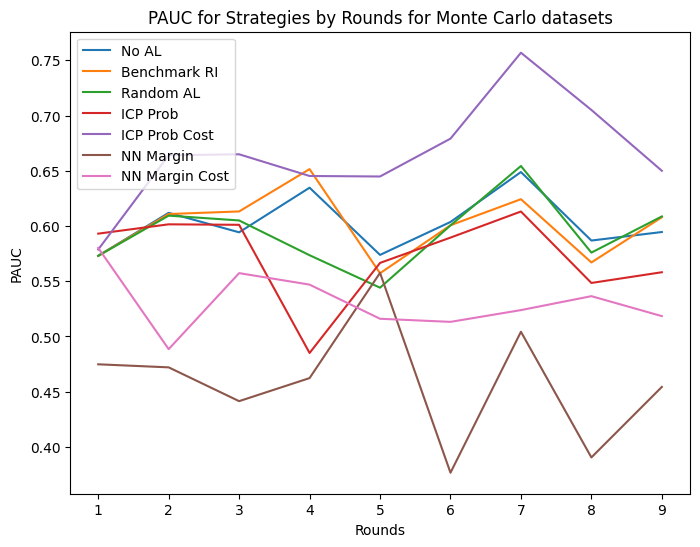

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in MC_datasets_PAUC.columns:
    ax.plot(MC_datasets_PAUC.index, MC_datasets_PAUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('PAUC')
ax.set_title('PAUC for Strategies by Rounds for Monte Carlo datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

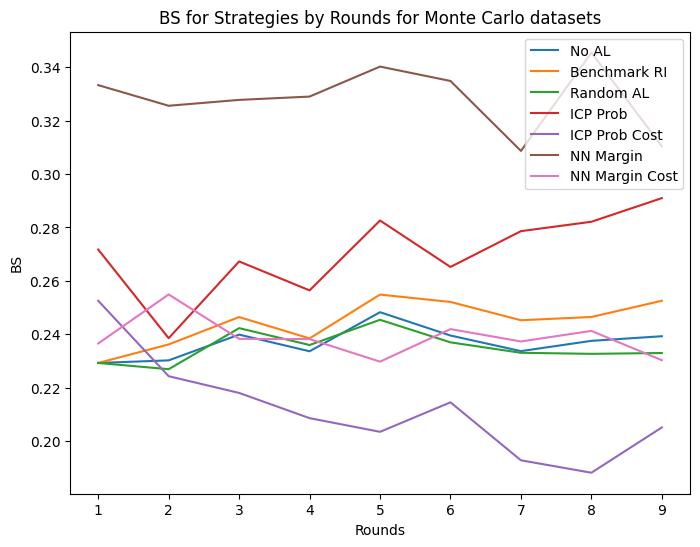

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in MC_datasets_BS.columns:
    ax.plot(MC_datasets_BS.index, MC_datasets_BS[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('BS')
ax.set_title('BS for Strategies by Rounds for Monte Carlo datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

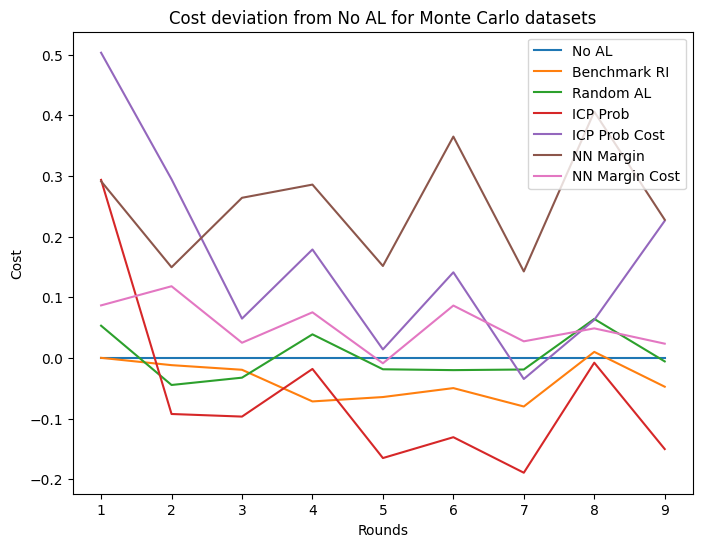

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in MC_datasets_Cost.columns:
    ax.plot(MC_datasets_Cost.index, MC_datasets_Cost[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('Cost')
ax.set_title('Cost deviation from No AL for Monte Carlo datasets')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Lending Club full data

In [ ]:
# Create average performance for LC_all
LC_all = results[-1]
LC_all_mean=[np.mean(df) for df in LC_all]
LC_all_mean

[AUC     0.850440
 PAUC    0.601950
 BS      0.111923
 Cost    0.000000
 dtype: float64,
 AUC     0.851600
 PAUC    0.587793
 BS      0.103894
 Cost    0.092408
 dtype: float64,
 AUC     0.853536
 PAUC    0.587668
 BS      0.104912
 Cost    0.425888
 dtype: float64,
 AUC     0.857101
 PAUC    0.576793
 BS      0.108311
 Cost    0.205660
 dtype: float64,
 AUC     0.853043
 PAUC    0.675299
 BS      0.180462
 Cost    0.784457
 dtype: float64,
 AUC     0.185823
 PAUC    0.577234
 BS      0.373880
 Cost    2.955725
 dtype: float64,
 AUC     0.848196
 PAUC    0.730519
 BS      0.189816
 Cost   -0.309581
 dtype: float64]

In [ ]:

# Create output dataframe
LC_all_final = pd.DataFrame(
{'Strategies' : strategies,
 'AUC': [df['AUC'] for df in LC_all_mean],
 'PAUC': [df['PAUC'] for df in LC_all_mean],
'BS': [df['BS'] for df in LC_all_mean],
'Cost': [df['Cost'] for df in LC_all_mean]})
LC_all_final.set_index('Strategies', inplace = True)    

In [ ]:
LC_all_final

,AUC,PAUC,BS,Cost
Strategies,,,,
No AL,0.850440,0.601950,0.111923,0.000000
Benchmark RI,0.851600,0.587793,0.103894,0.092408
Random AL,0.853536,0.587668,0.104912,0.425888
ICP Prob,0.857101,0.576793,0.108311,0.205660
ICP Prob Cost,0.853043,0.675299,0.180462,0.784457
NN Margin,0.185823,0.577234,0.373880,2.955725
NN Margin Cost,0.848196,0.730519,0.189816,-0.309581


In [ ]:
# Create output dataframe for AUC
LC_all_AUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    LC_all_AUC.iloc[:, i] = LC_all[i]['AUC']
LC_all_AUC.index = LC_all_AUC.index + 1

In [ ]:

# Create output dataframe for PAUC
LC_all_PAUC = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    LC_all_PAUC.iloc[:, i] = LC_all[i]['PAUC']
LC_all_PAUC.index = LC_all_PAUC.index + 1

In [ ]:

# Create output dataframe for BS
LC_all_BS = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    LC_all_BS.iloc[:, i] = LC_all[i]['BS']
LC_all_BS.index = LC_all_BS.index + 1

In [ ]:

# Create output dataframe Cost
LC_all_Cost = pd.DataFrame(columns=strategies)
for i in range(len(strategies)):
    LC_all_Cost.iloc[:, i] = LC_all[i]['Cost']
LC_all_Cost.index = LC_all_Cost.index + 1

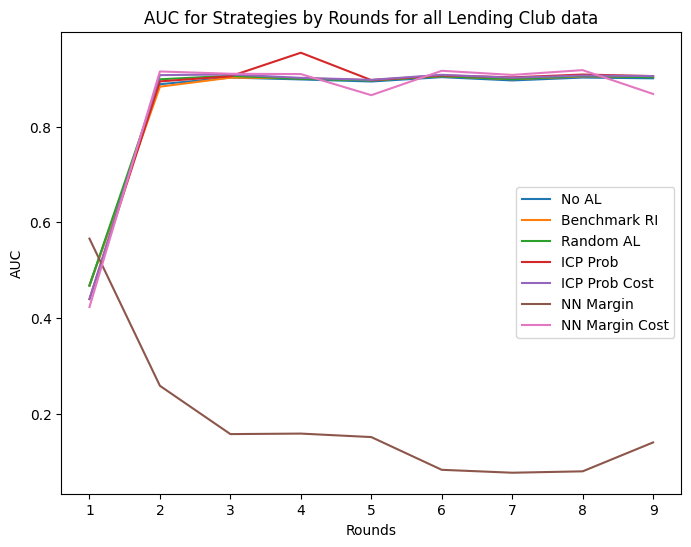

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in LC_all_AUC.columns:
    ax.plot(LC_all_AUC.index, LC_all_AUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('AUC')
ax.set_title('AUC for Strategies by Rounds for all Lending Club data')

# Add a legend
ax.legend()

# Show the plot
plt.show()

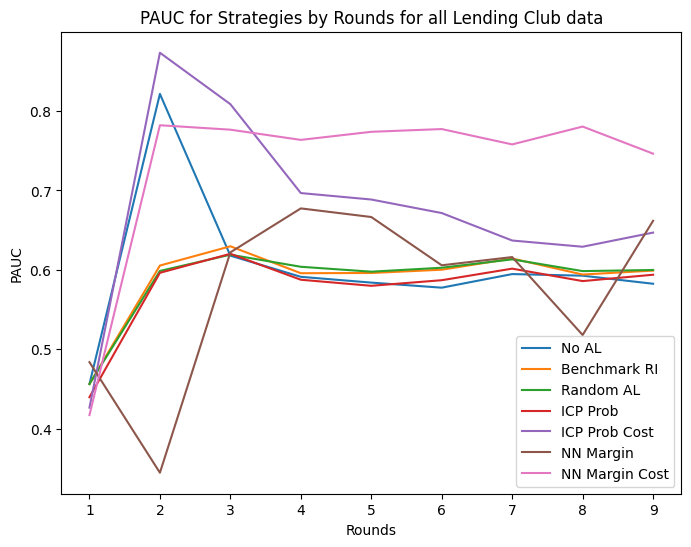

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in LC_all_PAUC.columns:
    ax.plot(LC_all_PAUC.index, LC_all_PAUC[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('PAUC')
ax.set_title('PAUC for Strategies by Rounds for all Lending Club data')

# Add a legend
ax.legend()

# Show the plot
plt.show()

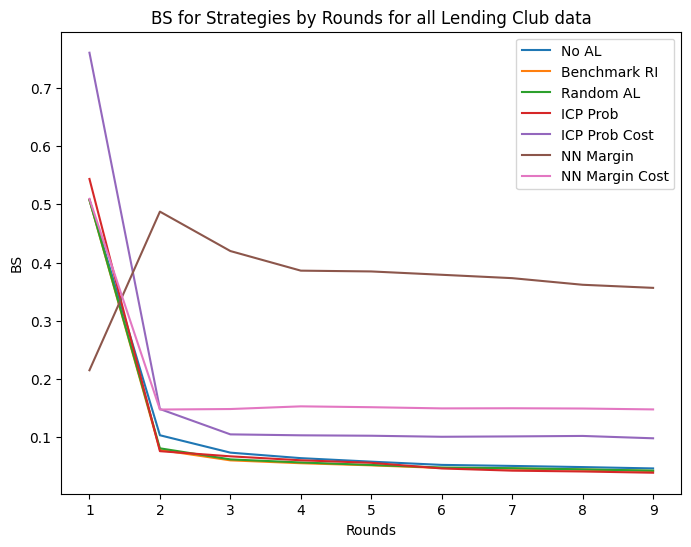

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in LC_all_BS.columns:
    ax.plot(LC_all_BS.index, LC_all_BS[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('BS')
ax.set_title('BS for Strategies by Rounds for all Lending Club data')

# Add a legend
ax.legend()

# Show the plot
plt.show()

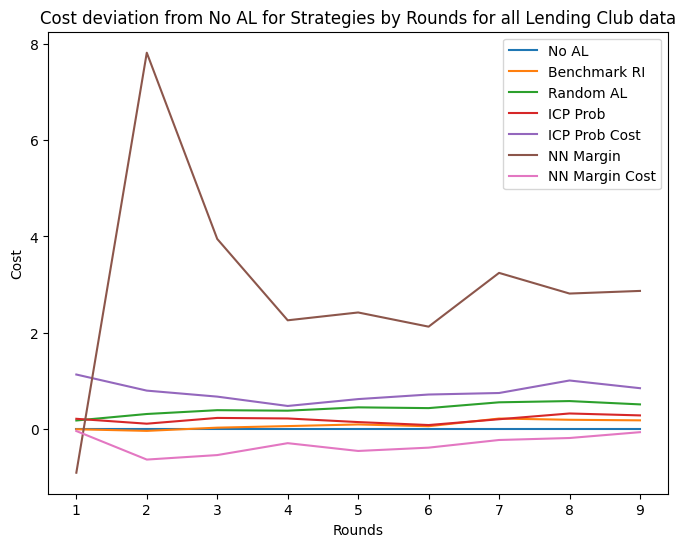

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through each column and plot the cell values
for col in LC_all_Cost.columns:
    ax.plot(LC_all_Cost.index, LC_all_Cost[col], label=col)

# Set labels and title
ax.set_xlabel('Rounds')
ax.set_ylabel('Cost')
ax.set_title('Cost deviation from No AL for Strategies by Rounds for all Lending Club data')

# Add a legend
ax.legend()

# Show the plot
plt.show()